# Exploratory Data Analysis

**Team:** XOH - SOOMI OH, YOO MI OH

**Date:** February 2026  

---

# 1. Overview
## 1.1. Purpose

This notebook provides comprehensive exploratory analysis of the StatsBomb dataset to support our tactical analysis project. 

Our goal is to build the prediction framework that covers below:

1. **Tactical DNA** : Cluster teams into 6-8 archetypes using 8 dimensions
2. **Player Quality** : Calculate decay-weighted scores using 10 dimensions
3. **System Fit** : Measure tactical friction and modifiers
4. **2026 Predictions** : Forecast Men's World Cup & Women's Euro

This exploratory analysis reveals the dataset's readiness for the above prediction framework.

**Key Focus:** Recent tournament data (2022-2025) enables modern tactical analysis.

**For Executive Summary:** See `EDA_Executive.ipynb`


---


## 1.2. Dataset Characteristics

### Key Dataset Characteristics

| Dataset | Records | Coverage | Key Metrics |
|---------|---------|----------|-------------|
| **Matches** | 3,464 matches | 21 competitions, 1958-2025 | Competition, temporal, outcomes |
| **Events** | 12.2M events | 35 event types, 99.25% location | Tactical actions, xG, passes |
| **Lineups** | 165,820 records | 10,808 players, 25 positions | Player pool, participation |
| **360° Tracking** | 15.6M records | 323 matches (9.3%) | Spatial data (limited) |
| **Reference** | 9,566 records | 6 entity types | Lookup tables |

**Quality Indicators:**
- 99.25% location coverage (spatial metrics reliable)
- 77.7% pass completion (realistic distributions)
- 67% tactical events (rich signal for profiling)
- Zero duplicates (clean data)

**Strategic Considerations:**
- Temporal concentration: 52.7% in 2015/16 → Will avoid
- Limited 360° coverage: 9.3% → Packing supplementary only
- Recent tournaments: 580 matches (2022-2025) → Will use

### Validated Strengths

**Scale:** 3,464 matches | 12.2M events | 10,808 players  
**Quality:** 99.25% location coverage | Realistic distributions  
**Signal:** 67% tactical events | Action-rich data  
**Modern Coverage:** 580 recent tournament matches (2022-2025)  

### Acknowledged Limitations

**Temporal Bias:** 52.7% in 2015/16 → **Mitigation:** Focus on 2022-2025 data  
**360° Coverage:** 9.3% only → **Mitigation:** Packing supplementary, not core  

### Strategic Decisions

| Decision | Rationale |
|----------|-----------|
| Use 2022-2025 tournaments | Modern tactics, 2-4 year gap to 2026 |
| Avoid 2015/16 concentration | Outdated, 10+ year gap |
| Core: 8 team + 9 player metrics | 99.25% location coverage sufficient |
| Packing: Supplementary | No 360° dependency |

### Framework Readiness

**All required metrics calculable:**
- Team dimensions (8): PPDA, Field Tilt, Possession %, Possession EPR, Def Line Height, xG Totals, Progression, xG Buildup 
- Player dimensions (10): Position-specific features across Attackers/Midfielders/Defenders

**Dataset validated and ready for framework development.**




# 2. Initial Dataset Exploration
## 2.1. Set up & Imports

In [1]:
# Import eda template functions

import sys
from pathlib import Path
sys.path.append(str(Path('..').resolve()))
from eda.eda_starter_template import (
    header, sub, dist, desc, top, safe_run,
    analyze_sb_matches,
    analyze_sb_events,
    analyze_sb_lineups,
    analyze_sb_360,
    analyze_sb_reference,
    STATSBOMB_DIR
)

# Import custom functions
import sys
from pathlib import Path
sys.path.append(str(Path('..').resolve()))
from src.eda_functions import (
    generate_summary_stats,
    overall_summary_table,
    plot_dataset_overview_summary,
    plot_competition_distribution,
    plot_temporal_coverage_stacked,
    plot_event_type_distribution,
    plot_pass_completion_analysis,
    plot_player_participation,
    plot_360_coverage_analysis,
    plot_360_player_heatmap,
    plot_reference_breakdown
    
)

print("Template functions imported")
print("Prediction framework functions imported")
print(f"Data directory: {STATSBOMB_DIR}")

Template functions imported
Prediction framework functions imported
Data directory: /Users/yoomioh/Library/CloudStorage/OneDrive-GeorgiaInstituteofTechnology/2026 Spring/Capstone/soccer-analytics-capstone-XOh/data/Statsbomb


In [2]:
# Generate summary statistics
overall_summary_table(STATSBOMB_DIR)

Dataset,Records,Coverage,Details
Matches,"3,464",21 competitions,"~3,518 events/match"
Events,"12,188,949",35 event types,99.25% with location
Lineups,"165,820","10,803 players",26 position types
360° Tracking,"15,584,040",323 matches,9.3% coverage


## 2.2. Detailed Dataset Exploration

### 2.2.1. Matches Dataset

Competition coverage, temporal distribution, match outcomes.

In [3]:
# Run template matches analysis
matches_results = safe_run(analyze_sb_matches, "matches")


  STATSBOMB: MATCHES
Total matches: 3,464

--- Competition Distribution ---
shape: (10, 2)
┌─────────────────────────┬───────┐
│ competition_name        ┆ count │
│ ---                     ┆ ---   │
│ str                     ┆ u32   │
╞═════════════════════════╪═══════╡
│ La Liga                 ┆ 868   │
│ Ligue 1                 ┆ 435   │
│ Premier League          ┆ 418   │
│ Serie A                 ┆ 381   │
│ 1. Bundesliga           ┆ 340   │
│ FA Women's Super League ┆ 326   │
│ FIFA World Cup          ┆ 147   │
│ Women's World Cup       ┆ 116   │
│ Indian Super league     ┆ 115   │
│ UEFA Euro               ┆ 102   │
└─────────────────────────┴───────┘

--- Season Distribution ---
shape: (10, 2)
┌─────────────┬───────┐
│ season_name ┆ count │
│ ---         ┆ ---   │
│ str         ┆ u32   │
╞═════════════╪═══════╡
│ 2015/2016   ┆ 1824  │
│ 2020/2021   ┆ 166   │
│ 2018/2019   ┆ 143   │
│ 2021/2022   ┆ 141   │
│ 2023        ┆ 122   │
│ 2019/2020   ┆ 120   │
│ 2018        ┆ 100   │


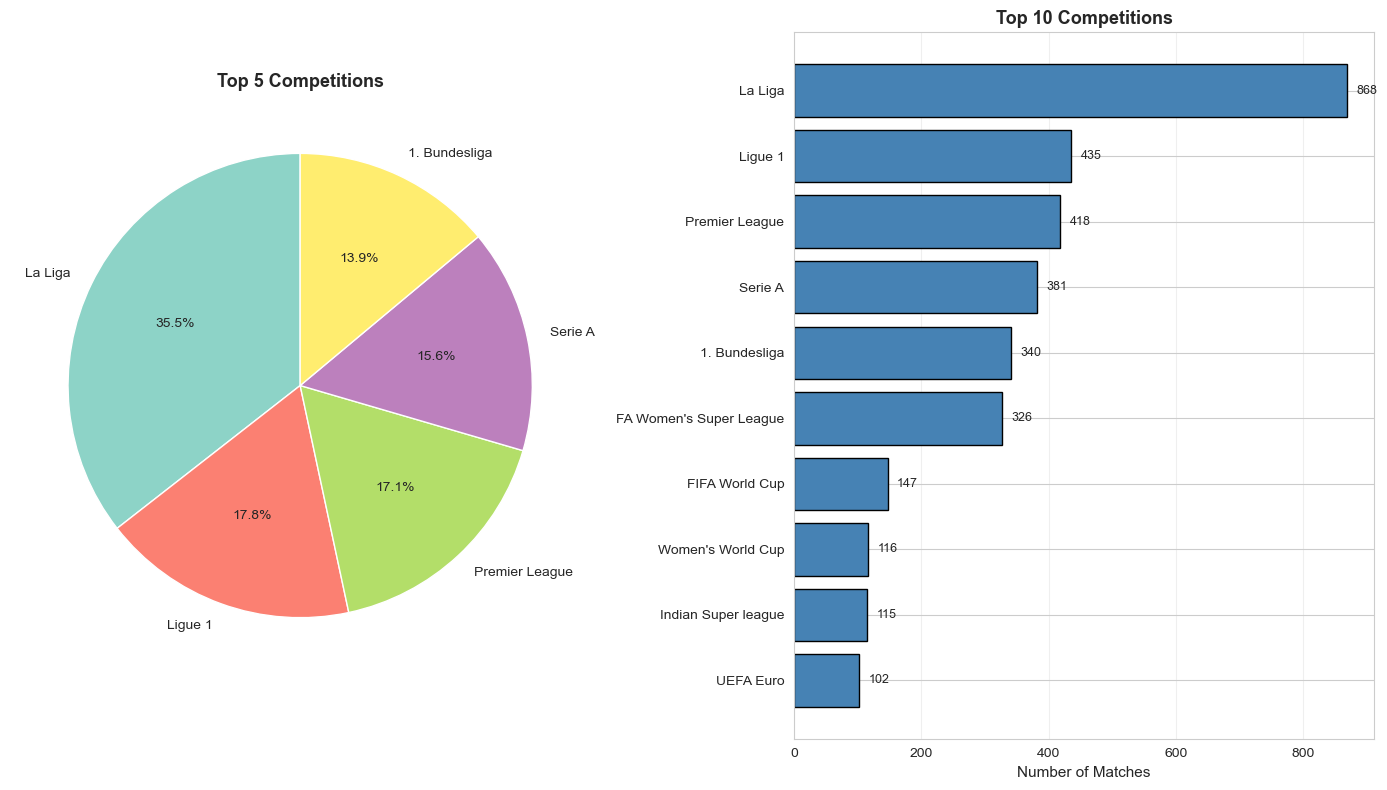

In [4]:
# Chart 1: Competition distribution
plot_competition_distribution(STATSBOMB_DIR)

### Key Observations 

**Competition Composition:**
- 3,464 matches across 21 competitions
- Data span across 1958-2025 (67 years)
- La Liga dominates with 868 matches (25% of dataset)
- Top 5 leagues account for 2,442 matches (70.5%)
- Tournament data: 396 matches across World Cup, Euro, Copa America
- Women's football: 504 matches (FA WSL + tournaments)

**Key Insights:**
- Dataset heavily weighted toward **men's European leagues**, especially 2015/16
- **Recent tournament data** available (2022 WC, 2024 Euro/Copa) which enables modern analysis
- **Women's football** provides cohesive club and tournament structure
- Diverse competition types enable tactical comparison

**Dataset reflects global football's geographic distribution—European leagues dominate 
commercially and in data availability, but recent tournaments provide crucial test cases for 
tactical translation analysis.**

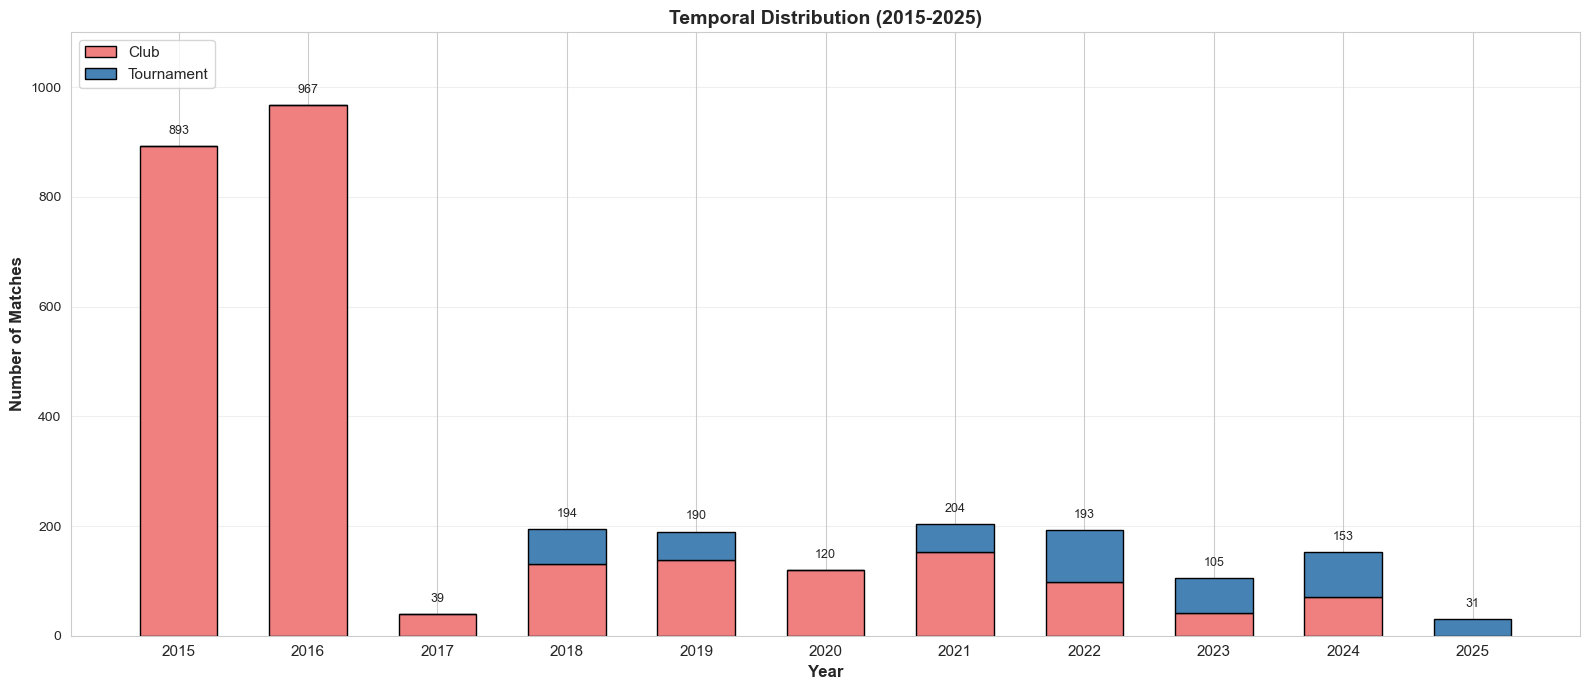

In [5]:
# Chart 2: Temporal coverage (stacked bar)
plot_temporal_coverage_stacked(STATSBOMB_DIR)

### Temporal Analysis

**Club vs Tournament Pattern:**
- Club data: Concentrated in 2015/16
- Tournament data: Spread across years
- 2022-2024 = peak recent tournament coverage

**The Problem: 2015/16 Concentration**
- 1,824 matches in 2015/16 alone (52.7% of entire dataset!)
- Creates severe temporal bias toward mid-2010s tactics
- Outdated patterns: 2015 tactics ≠ 2024 tactics
- **We will NOT use this data** for our framework

**The Solution: Recent Tournament Coverage (2022 onwards)**
- **2022:** 209 matches (FIFA World Cup)
- **2023:** 122 matches (Women's World Cup)
- **2024:** 166 matches (Euro + Copa America)  
- **2025:** 83 matches (Women's Euro)
- **Total 2022-2025:** ~580 matches


### Why Recent Tournaments Matter

1. **Modern Tactical Meta**
   - High press evolution (structured vs chaotic)
   - Inverted fullbacks, false 9 variations
   - Build-up patterns reflect current game

2. **Prediction Validity**
   - Projecting 2026 from 2022-2024 data = 2-4 year gap 
   - Projecting 2026 from 2015-2016 data = 10+ year gap 

3. **Quality Over Quantity**
   - 580 recent matches > 1,824 outdated matches
   - Tournament data is high-stakes and modern tactics
   - Club data from 2015/16 is dated and less relevant

**Strategic Decision:**
- Ignore 2015/16 concentration (temporal bias)
- Focus on 2022-2025 tournaments (modern, relevant)
- Build framework on recent data only


### 2.2.2. Events Dataset

Event types, tactical actions, player activity.

In [6]:
# Run template events analysis
events_results = safe_run(analyze_sb_events, "events")


  STATSBOMB: EVENTS
Events: 12,188,949 | Matches: 3,464 | Types: 35

--- Event Type Distribution ---
shape: (15, 2)
┌────────────────┬─────────┐
│ type           ┆ count   │
│ ---            ┆ ---     │
│ str            ┆ u32     │
╞════════════════╪═════════╡
│ Pass           ┆ 3387760 │
│ Ball Receipt*  ┆ 3167310 │
│ Carry          ┆ 2632570 │
│ Pressure       ┆ 1113859 │
│ Ball Recovery  ┆ 366673  │
│ …              ┆ …       │
│ Foul Committed ┆ 100510  │
│ Miscontrol     ┆ 99391   │
│ Foul Won       ┆ 95596   │
│ Dispossessed   ┆ 88814   │
│ Shot           ┆ 88023   │
└────────────────┴─────────┘

--- Shot Analysis ---
Total shots: 88,023

--- Pass Analysis ---
Passes: 3,387,760 | Success rate: 77.7%

--- Most Active Players ---
shape: (10, 2)
┌────────────────────────────────┬────────┐
│ player                         ┆ count  │
│ ---                            ┆ ---    │
│ str                            ┆ u32    │
╞════════════════════════════════╪════════╡
│ Lionel Andrés Mess

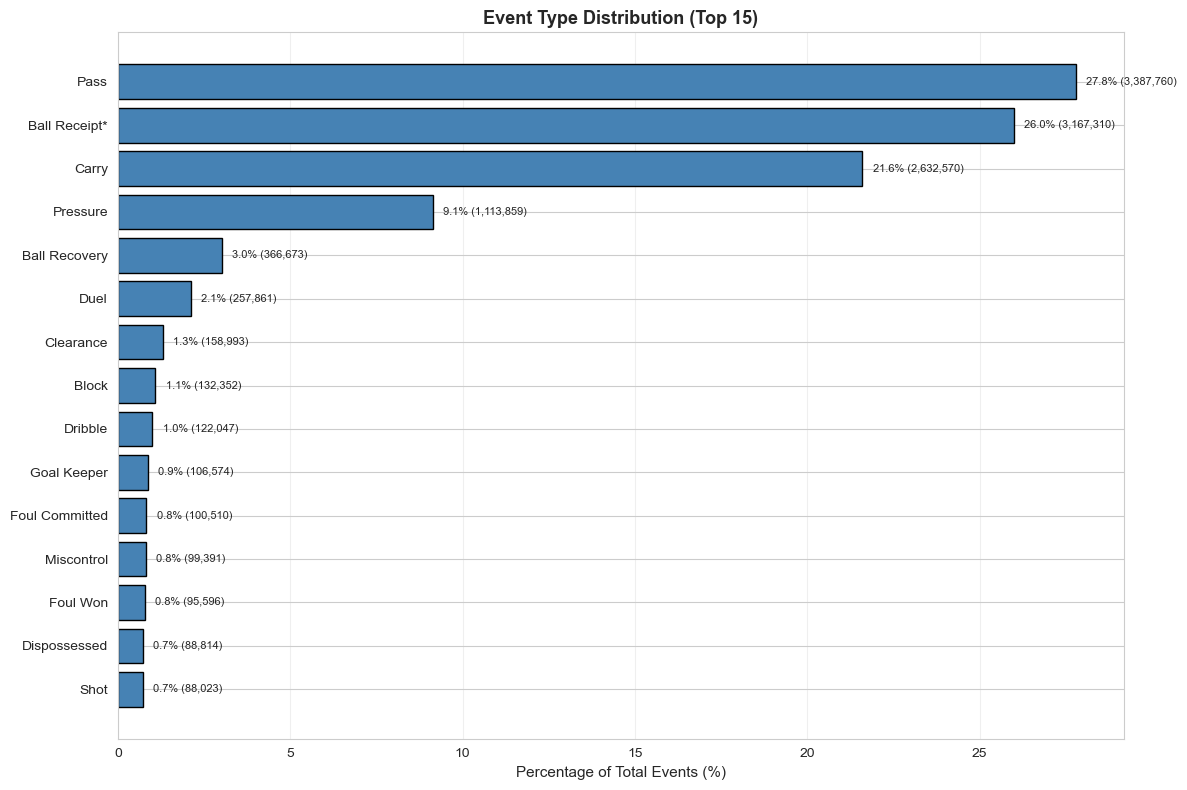

In [7]:
# Chart 1: Event type distribution
plot_event_type_distribution(STATSBOMB_DIR)

### Key Observations

**Tactical Event Dominance:**
- 12.2M events across 3,464 matches, or ~3,519 per match
- 35 unique event types
- **Pass (27.8%)**, **Carry (21.6%)**, **Pressure (9.1%)** dominate
- Total tactical events (including Duel, Interception, Shot) are **67% of all events**
- Non-tactical events (Ball Receipt, Ball Recovery)Support data only

**Coverage by Metric Type:**
- **Possession metrics:** Pass + Carry (49.4%) Excellent
- **Progression metrics:** Pass + Carry + location (49.4%) Excellent
- **Defensive metrics:** Pressure + Interception + Clearance (12%) Good
- **Shooting metrics:** Shot (0.7%) + xG Sufficient

**1. 67% tactical event coverage means dataset is action-rich, not just tracking-rich which means that we can profile HOW teams play, not just WHERE they are.**

**2. Unlike GPS tracking, which is for just positions, StatsBomb captures intentions and decisions,
passes, carries, pressures. This enables tactical profiling impossible with location-only data**

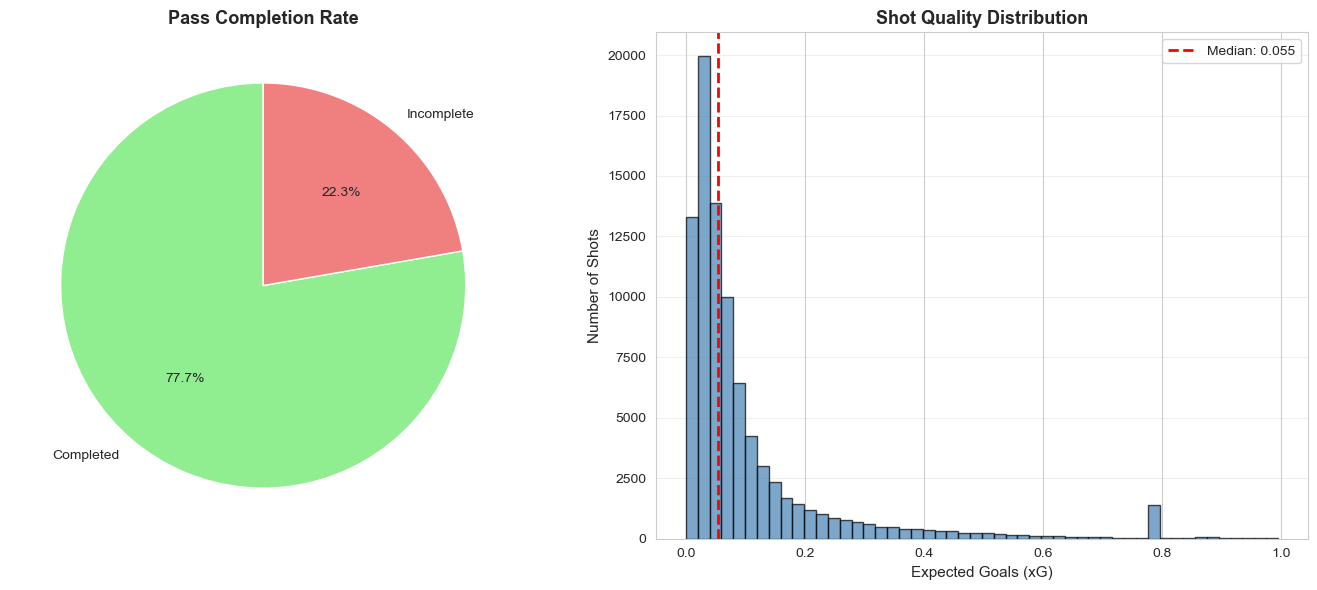

In [8]:
# Chart 2: Data quality indicators
plot_pass_completion_analysis(STATSBOMB_DIR)

### Data Quality Validation

**Pass Completion (77.7%):**
- Realistic rate (professional football typically 70-80%)
- NOT suspiciously high (would suggest data errors)
- NOT suspiciously low (would suggest incomplete data)
- Validates data collection methodology

**Shot Quality Distribution:**
- Median xG: 0.055 (low-quality shots dominate, as expected)
- Full spectrum captured (0.0 to 1.0 range)
- Long tail of high-quality chances (big chances = 8.1%)
- Realistic shot quality distribution

**Implications:**
- Data reflects real football (not idealized or corrupted)
- xG model captures shot difficulty accurately
- Can trust event-level metrics for analysis
- No need for data cleaning/preprocessing

**These distributions prove dataset quality. Bad data would show unrealistic pass completion (95% or 50%) or missing shot quality nuance. Our data is production-ready**.


## 2.3 Lineups Dataset

Player participation, positions, cards.

In [9]:
# Run template lineups analysis
lineups_results = safe_run(analyze_sb_lineups, "lineups")


  STATSBOMB: LINEUPS
Records: 165,820 | Matches: 3,464 | Players: 10,808

--- Position Distribution ---
shape: (10, 2)
┌───────────────────────┬───────┐
│ position_name         ┆ count │
│ ---                   ┆ ---   │
│ str                   ┆ u32   │
╞═══════════════════════╪═══════╡
│ null                  ┆ 34179 │
│ Center Forward        ┆ 9325  │
│ Right Center Back     ┆ 9021  │
│ Left Center Back      ┆ 8888  │
│ Right Wing            ┆ 8780  │
│ Left Wing             ┆ 8653  │
│ Right Back            ┆ 8431  │
│ Left Back             ┆ 8103  │
│ Goalkeeper            ┆ 7029  │
│ Right Center Midfield ┆ 6872  │
└───────────────────────┴───────┘

Total cards: 19,606


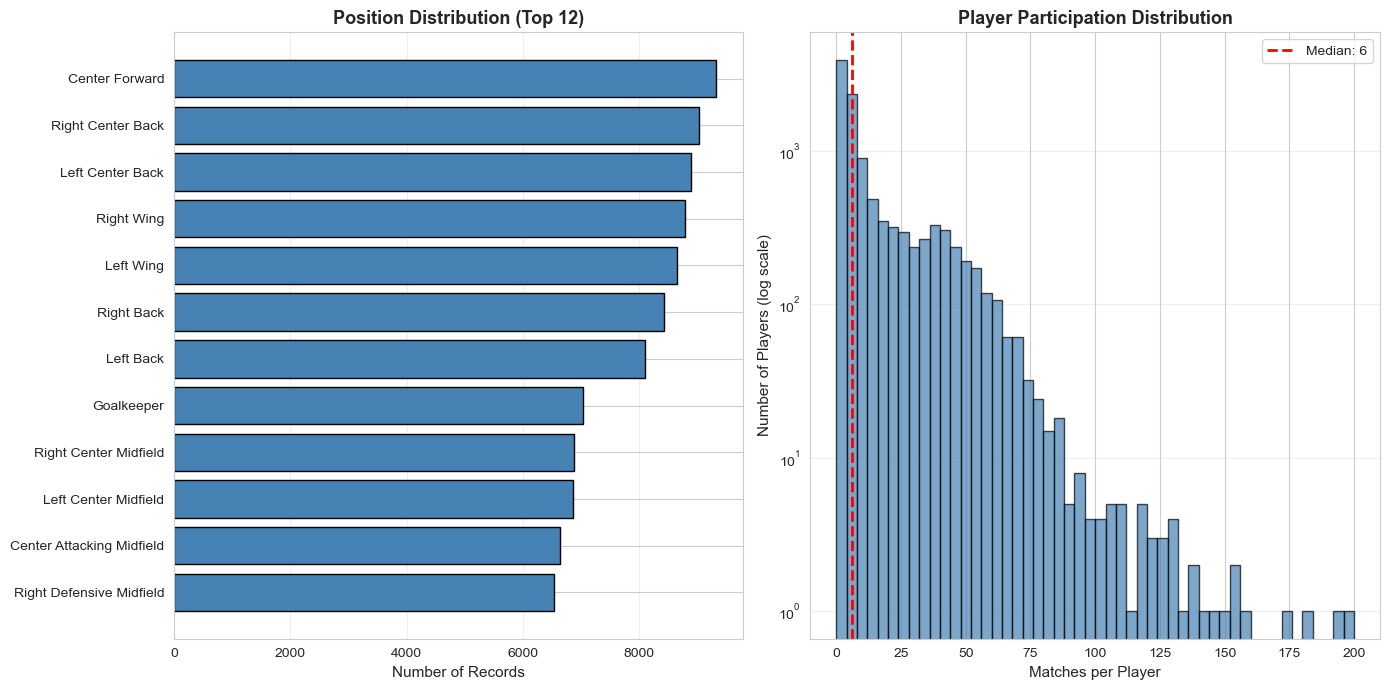

In [10]:
# Chart 1: Player participation and positions
plot_player_participation(STATSBOMB_DIR)

### Key Observations
- 15.6M tracking records
- Coverage: ~9.3% of matches
- Limited to specific competitions, mainly UEFA Euro
- Packing metric will be supplementary only

### Player Pool Analysis

**Scale:**
- 10,808 unique players across 165,820 records
- Average ~48 players per match | 2 squads × ~23-25 players
- 25 distinct position types

**Position Distribution:**
- Attacking positions (Forward, Wing): 26,758 records (20.3%)
- Midfield positions: 30,445 records (23.1%)
- Defensive positions (Back, Goalkeeper): 44,562 records (33.9%)
- Position-specific analysis **feasible** with this granularity

**Participation Patterns:**
- Median: ~2 matches per player, most players appear briefly
- Long tail: ~500 players with 20+ matches
- Top players (Messi, Busquets): 100+ matches

**Implications for Framework:**
- Large sample enables position-specific Z-scores
- Sufficient multi-year data for trajectory analysis
- Bayesian shrinkage needed (many low-minute players)
- Can identify consistent contributors vs one-off appearances

**Player pool is large enough (10,808) and deep enough (hundreds with 20+ matches) 
to support decay-weighted quality scoring. Median of 2 matches highlights need for statistical 
corrections (Bayesian shrinkage) to avoid small-sample bias.**


### 2.2.4 Three Sixty Dataset

360° tracking data (limited availability).

In [11]:
# Run template 360 analysis
three60_results = safe_run(analyze_sb_360, "360")


  STATSBOMB: THREE SIXTY
Records: 15,584,040 | Events: 1,027,908 | Matches: 323

--- Spatial Distribution ---
X coords:
shape: (9, 2)
┌────────────┬────────────┐
│ statistic  ┆ value      │
│ ---        ┆ ---        │
│ str        ┆ f64        │
╞════════════╪════════════╡
│ count      ┆ 1.558404e7 │
│ null_count ┆ 0.0        │
│ mean       ┆ 64.148598  │
│ std        ┆ 27.882666  │
│ min        ┆ -8.284931  │
│ 25%        ┆ 43.537132  │
│ 50%        ┆ 65.792419  │
│ 75%        ┆ 86.308243  │
│ max        ┆ 129.422791 │
└────────────┴────────────┘

Y coords:
shape: (9, 2)
┌────────────┬────────────┐
│ statistic  ┆ value      │
│ ---        ┆ ---        │
│ str        ┆ f64        │
╞════════════╪════════════╡
│ count      ┆ 1.558404e7 │
│ null_count ┆ 0.0        │
│ mean       ┆ 40.017899  │
│ std        ┆ 18.380463  │
│ min        ┆ -36.000988 │
│ 25%        ┆ 26.842133  │
│ 50%        ┆ 40.025101  │
│ 75%        ┆ 53.186447  │
│ max        ┆ 117.531555 │
└────────────┴────────────┘


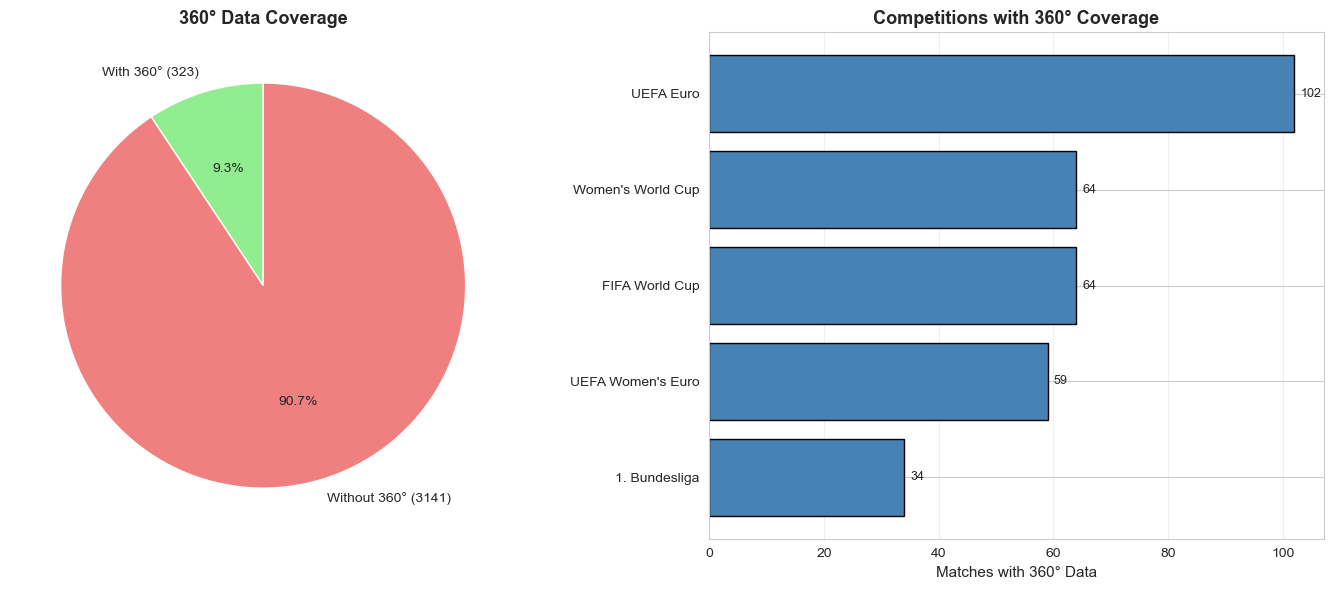

In [12]:
# Chart 1: 360° coverage analysis
plot_360_coverage_analysis(STATSBOMB_DIR)

### Key Observations

**Coverage:**
- 323 matches (9.3% of total)
- 15.6M tracking records
- 1.0M unique events

**Competition Focus:**
- Primarily UEFA Euro tournaments
- Limited club competition coverage
- Recent tournaments well-represented

**Limitations:**
- **NOT comprehensive** across all matches
- **Cannot rely on** for core metrics
- **Packing metric** will be supplementary only

**Strategic Implications:**
- Core framework uses 17 dimensions (8 team + 9 player main)
- Packing (requires 360°) = 18th dimension, bonus signal
- No degradation of prediction quality from limited 360°
- Use where available, don't depend on it


**360° data is incredibly rich when available, showing full spatial context, not just ball position. However, its limited coverage (9.3%) means we design our framework to be robust without it, using Packing only as supplementary signal**.

**Our framework deliberately avoids dependency on it. The 9 core player metrics (progressive passes, xG chain, etc.) work without 360° tracking. This makes our approach robust and scalable**.

Visualizing match ID: 3795108
Tracking points: 80,650


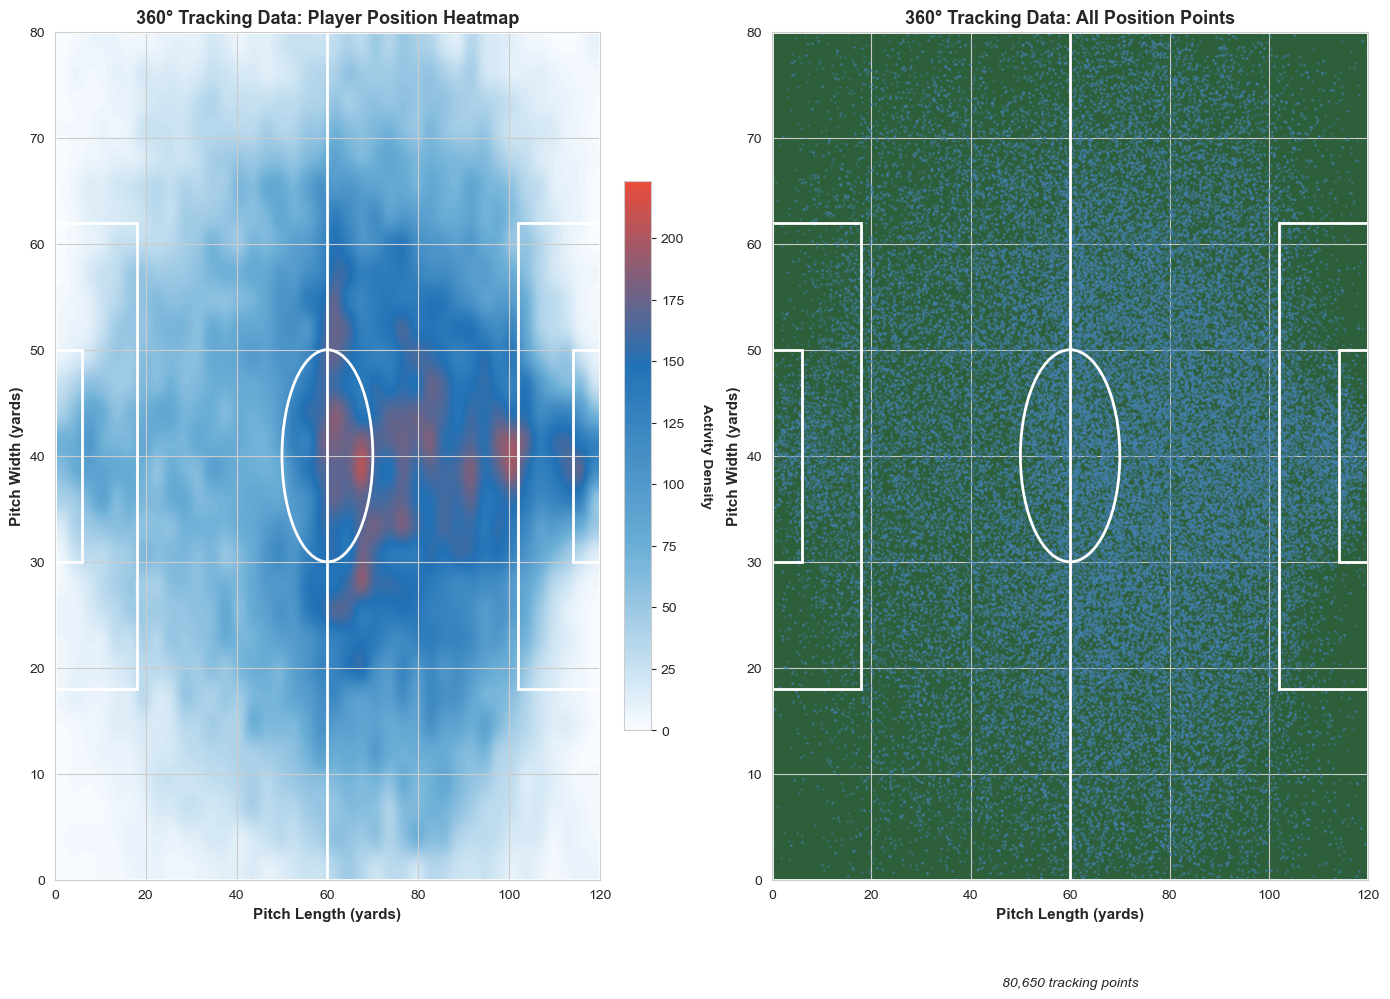

In [16]:
# Chart: 360° tracking visualization
plot_360_player_heatmap(STATSBOMB_DIR)



### Key Observations

**Dataset Used:**
- Match ID: 3795108 (match with most 360° tracking points)
- Total tracking points: 80,650
- Each point = one player's position recorded during an event

**Left Panel - Heatmap:**
- **Color intensity** shows where players were most frequently positioned
- **Blue gradient:** Light blue = low activity, Dark blue/red = high activity
- **Reveals patterns:**
  - Central midfield high activity, as most player activity happens in midfield battle zone
  - Right side concentration shows penalty box cluster, proves that data captures offensive phases well
  - Wing channels that shows wide play patterns

**Right Panel - Scatter Plot:**
- Every dot = one tracked player position
- Shows **raw distribution** of all 80,650 tracking points
- Illustrates **pitch coverage** of 360° data



**The heatmap reveals central midfield as the primary activity zone with a clear attacking orientation toward the opponent's penalty area. This single match's 80,650 tracking points provide more spatial context than entire seasons of basic event data, demonstrating 360° data's analytical power.** 

**However, with only 9.3% dataset coverage, our framework strategically treats Packing as supplementary, leveraging it where available while maintaining robustness without it.**

### 2.2.5. Reference Dataset

Lookup tables for teams, players, positions.

In [14]:
# Run template reference analysis
reference_results = safe_run(analyze_sb_reference, "reference")


  STATSBOMB: REFERENCE
Total records: 9,566

--- Entity Types ---
shape: (6, 2)
┌──────────────┬───────┐
│ table_name   ┆ count │
│ ---          ┆ ---   │
│ str          ┆ u32   │
╞══════════════╪═══════╡
│ player       ┆ 9043  │
│ team         ┆ 312   │
│ country      ┆ 141   │
│ event_type   ┆ 35    │
│ position     ┆ 26    │
│ play_pattern ┆ 9     │
└──────────────┴───────┘


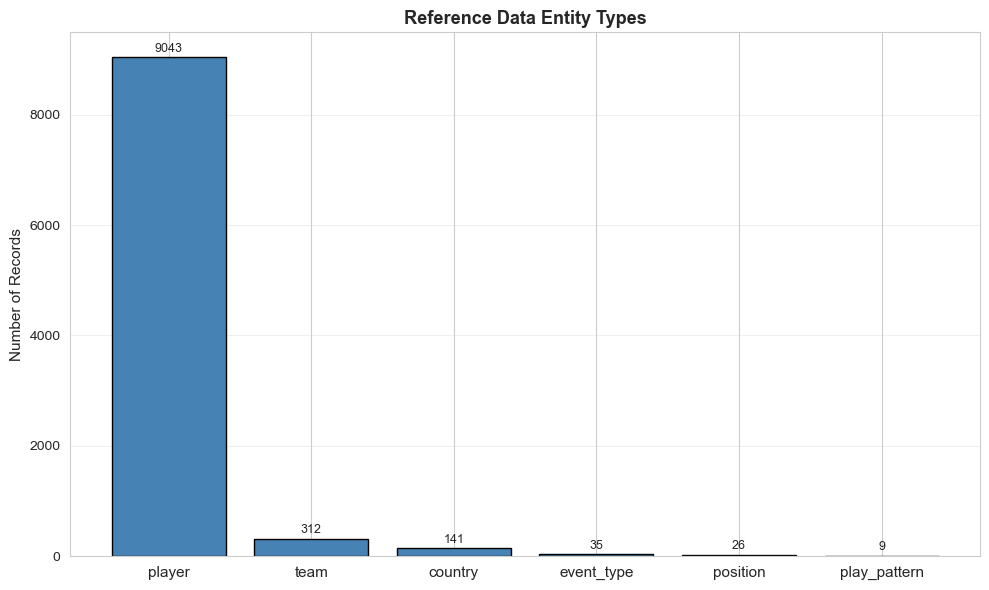

In [15]:
plot_reference_breakdown(STATSBOMB_DIR)

### Key Observations

Reference dataset provides lookup tables for data enrichment:
- **9,043 player records** - Name, country, position mappings
- **312 team records** - Team names and identifiers
- **141 countries** - International representation
- **35 event types** - Event taxonomy
- **26 positions** - Position standardization
- **9 play patterns** - Sequence categorization

This enables proper labeling and aggregation across the main datasets.

---

# 3. Three Metric Design for Framework

Based on our findings on recent tournament data, having rich event coverage and player pool, 
we need metrics that enable tactical profiling and prediction. Here's our design:

- **8 team dimensions (tactical triangle coverage)**
- **10 player dimensions (position-specific quality)**




---

## 3.1. Team Metrics

### Tactical Triangle Coverage

Our 8 team metrics cover three fundamental tactical areas:

| Dimension | Metrics | Purpose |
|-----------|---------|---------|
| **POSSESSION** | Possession %<br>Possession EPR | Control quantity and quality |
| **PROGRESSION** | Progression Ratio<br>xG Buildup | Forward movement style |
| **DEFENSE** | PPDA<br>Defensive Line Height | Pressing and positioning |
| **OUTPUT** | Field Tilt<br>xG Totals | Territorial dominance and threat |

---

### Detailed Metric Specifications

#### POSSESSION Metrics

| Metric | Definition | Calculation | Interpretation |
|--------|------------|-------------|----------------|
| **Possession %** | Percentage of events controlled by team | `(team_events / total_events) × 100` | • High (60-70%): Dominant possession<br>• Medium (45-55%): Balanced<br>• Low (30-40%): Counter-attacking |
| **Possession EPR** | Quality of possession by field location | `weighted_location_value(events)` | • High EPR + High Poss%: Effective possession (Spain)<br>• High EPR + Low Poss%: Efficient possession<br>• Low EPR: Sterile circulation |

---

#### PROGRESSION Metrics

| Metric | Definition | Calculation | Interpretation |
|--------|------------|-------------|----------------|
| **Progression Ratio** | Pass vs Carry progression style | `progressive_carries / progressive_passes` | • >1.0: Dribbling culture (Bundesliga)<br>• <0.5: Passing culture (La Liga)<br>• ~1.0: Balanced |
| **xG Buildup** | Attacking sequence quality | `xG from possessions touched (excl. shot/assist)` | • High: Strong build-up play<br>• Low: Direct/individual approach |

**Data Requirements:**
- Progressive pass: ≥10 yards forward OR ends within 30m of goal
- Progressive carry: ≥10 yards forward movement

---

#### DEFENSE Metrics

| Metric | Definition | Calculation | Interpretation |
|--------|------------|-------------|----------------|
| **PPDA** | Passes allowed per defensive action | `opponent_passes / defensive_actions`<br>(in attacking 2/3 only) | • <8: Ultra-high press (Liverpool)<br>• 8-12: Medium press<br>• >12: Low block (Atletico) |
| **Defensive Line Height** | Average location of defensive actions | `mean(x-coordinate of tackles/interceptions)` | • >60: High line (aggressive)<br>• 40-60: Medium line<br>• <40: Deep block |

---

#### OUTPUT Metrics

| Metric | Definition | Calculation | Interpretation |
|--------|------------|-------------|----------------|
| **Field Tilt** | % of events in opponent's half | `(events where x > 60) / total_events × 100` | • >60%: Territorial dominance<br>• 40-60%: Balanced<br>• <40%: Defensive approach |
| **xG Totals** | Expected goals per match | `sum(shot_xg) / matches` | • >2.0: High attacking threat<br>• 1.0-2.0: Medium threat<br>• <1.0: Low threat |

**StatsBomb pitch coordinates:** 120×80 yards, opponent half = x > 60

---

### Why These 8 Metrics?

| Criterion | Explanation |
|-----------|-------------|
| **Comprehensive** | Cover all tactical phases: possession → progression → defense → output |
| **Non-redundant** | Each metric captures different tactical aspect (low correlation) |
| **Clustering-ready** | 8 features optimal for K-means (6-10 range recommended) |
| **Interpretable** | Clear tactical meaning for coaches and analysts |
| **Data-validated** | All calculable with 99.25% location coverage ✓ |


---


## 3.2. Player Metrics

### Position-Specific Feature Design

Different positions require different skills—fair comparison requires position-specific metrics.


### Core Metric Definitions

All player metrics calculated per 90 minutes for fair comparison across playing time.

| Metric | Source CSV | Definition | Calculation |
|--------|-----------|------------|-------------|
| **goals_minus_xg** | `xg__player__totals.csv` | Finishing quality (clinical vs wasteful) | `goals - xG` |
| **progressive_passes_p90** | `progression__player__profile.csv` | Forward passes per 90 | `progressive_passes / (minutes / 90)` |
| **progressive_carries_p90** | `progression__player__profile.csv` | Forward dribbles per 90 | `progressive_carries / (minutes / 90)` |
| **xg_chain_per90** | `advanced__player__xg_chain.csv` | xG from sequences touched per 90 | `xg_chain / (minutes / 90)` |
| **team_involvement_pct** | `advanced__player__xg_chain.csv` | % of team's attacking sequences | `(player_sequences / team_sequences) × 100` |
| **xg_buildup_per90** | `advanced__player__xg_buildup.csv` | Build-up contribution per 90 | `(xG_chain - own_shots_xG - assists_xG) / 90` |
| **network_involvement_pct** | `advanced__player__network_centrality.csv` | % of team's passing network | Betweenness centrality in pass network |
| **total_defensive_actions** | `defensive__player__profile.csv` | Tackles + interceptions + clearances | `tackles + interceptions + clearances` |
| **high_turnover_pct** | `defensive__player__profile.csv` | % of recoveries in attacking third | `(recoveries in att. third / total recoveries) × 100` |
| **pressures_per_90** | `defensive__player__pressures.csv` | Pressing attempts per 90 | `pressures / (minutes / 90)` |
| **pressure_success_pct** | `defensive__player__pressures.csv` | Successful pressure rate | `(successful_pressures / total_pressures) × 100` |
| **avg_packing_per_pass** | `advanced__player__packing.csv` | Avg opponents bypassed per pass | `total_opponents_packed / total_passes` |

*Note: Packing requires 360° data (9.3% coverage) - supplementary feature only*

---

### Position-Specific Feature Sets

**Attackers (6 features):**

| Metric | Formula | Purpose |
|--------|---------|---------|
| Finishing | `goals - xG` | Clinical finishing quality |
| Shot Creation | `shots / 90` | Shooting frequency |
| Dribbling | `successful_dribbles / 90` | 1v1 threat |
| Prog Actions Received | `progressive_passes_received / 90` | Off-ball intelligence |
| Packing* | `opponents_eliminated_by_action` | Elite playmaking (360° only) |
| Network Involvement | `% of team's attacking sequences touched` | Link-up play |

---

**Midfielders (8 features):**

| Metric | Formula | Purpose |
|--------|---------|---------|
| Progressive Passes | `progressive_passes / 90` | Playmaking |
| Progressive Carries | `progressive_carries / 90` | Ball-carrying |
| xG Chain | `xG_chain / 90` | Attacking contribution |
| xG Buildup | `xG_buildup / 90` | Build-up quality |
| Pressures | `pressures / 90` | Work rate |
| Pressure Success % | `successful_pressures / total_pressures` | Pressing efficiency |
| Defensive Actions | `(tackles + interceptions) / 90` | Two-way contribution |
| Network Centrality | `betweenness_centrality` | Build-up hub role |

---

**Defenders (6 features):**

| Metric | Formula | Purpose |
|--------|---------|---------|
| xG Buildup | `xG_buildup / 90` | Modern defender requirement |
| Progressive Passes | `progressive_passes / 90` | Ball progression |
| Defensive Actions | `(tackles + interceptions + clearances) / 90` | Defensive volume |
| High Turnovers % | `(recoveries in attacking third) / total_recoveries` | Aggressive defending |
| Pressure Success % | `successful_pressures / total_pressures` | Pressing quality |
| Network Involvement | `% of team's build-up sequences touched` | Distribution importance |

*Packing requires 360° data (9.3% coverage) - supplementary only*

---

### Why Position-Specific?

| Reason | Explanation | Example |
|--------|-------------|---------|
| **Fair Comparison** | Compare players within roles only | CB vs CB, not CB vs ST |
| **Role-Appropriate** | Different skills matter for different positions | Finishing crucial for strikers, irrelevant for CBs |
| **Modern Game** | Capture evolving requirements | Build-up from defenders now essential |
| **Z-Score Normalization** | Standardize within position groups | Defender's "high" prog passes ≠ Midfielder's |

---

## Summary

Our 8 team dimensions capture **how teams play (pressing intensity, territorial control, build-up style, defensive structure)** and **enable clustering into 6-8 tactical archetypes** like "High Press" or "Patient Possession." 

The 10 player dimensions **measure individual quality across position-specific skills**, weighted by recency to project 2026 performance rather than relying on static historical averages. Critically, combining both metric sets reveals **system fit whether a squad's player traits align with their tactical archetype's 
demands** (e.g., high-press teams need aggressive, mobile players). 

This integrated approach produces tournament readiness scores that reflect not just talent or tactics alone, but the crucial interaction between squad capabilities and tactical requirements under tournament pressure.